<a href="https://colab.research.google.com/github/martha-irungu/WK4_CORE_IP/blob/master/WK4_IP_Core_Martha_Irungu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Defining the problem

The research problem was to perform a hypothesis testing to investigate a claim; 

i)Hypothesis 1

Testing whether the mean of blue cars taken in weekdays is the same as blue cars taken over the weekend.

Ho:blue cars taken weekdays-bluecars taken weekend=0

H1:blue cars taken weekdays-bluecars taken weekend!=0

ii)Hypothesis 2

Testing population mean for Blue cars taken from postal code 92100 is greater than those taken form postal code 91330

Ho:blue cars taken from postal code 92100>=bluecars taken from postal code 91330

H1:blue cars taken from postal code 92100< bluecars taken from postal code 91330

b)Defining the Metric for Success

•	Clearly stating a null hypothesis and alternative hypothesis
•	Clearly stating an alternative hypothesis
•	Give the value of the test statistic
•	Report the P-value
•	Clearly state your conclusion (i.e. ‘Reject the Null’ or fail to reject)


c) Understanding the context

Autolib’ was an electric car-sharing company owned by Bollore industrial group that operated in France in multiple cities including Paris between 2011 and 31st July 2018. Autolib owned cars which were which could be leased by public and returned after use. Since they were electric cars, there were charging stations located at different locations where customers could pick and drop back the cars after use.

The model of electric cars used by Autolib was:
•	Blue car - A passenger electric car.
More background details about this car are available on this link
•	Utilib car - This is a red-blue car. Apart from the passenger model, it has a delivery variant that has two seats to create more space for cargo. It’s red in color.
•	Utilib 1.4

I am working as a data scientist for Autolib, the car-sharing service company. I have been tasked by the management to investigate the 2 claims. 


d) Recording the Experimental Design

Below are the steps i took to implement this solution

1) Business Understanding: This sheds light to the context of the business question that we are trying to answer hence keep the focus during the data analysis so that we meet the intended objective.

2) Reading the data: Reading our data with and aim to understand the variables and observations.

3) Checking our data: This to get details about the dataset, the number of records, the statistal summary,the datatypes in our dataset among others.

4) Tidying the data, I performed all my data cleaning and preparation to make my data ready for analysis.

5) EDA, the data was analysed and visualized.

6) Implementing hypothesis testing

7)Conclusion



e) Data Relevance

The data was sourced from Autolib, an electric car sharing company, hence relevant for the research question.

#2. Reading the data

In [43]:
#Importing the libraries that we need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy import stats as st
import scipy.stats as stats

#3. Checking the Data

In [61]:
#Previewing the top 5 records of our dataset
df=pd.read_csv('autolib.csv')
df.head() 

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [11]:
#Previewing tail of 5 records of our dataset
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [12]:
#Checking the data types

df.dtypes

#Our dataset has integers and object data types

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [13]:
#Changing date from object to date time
df.date=pd.to_datetime(df.date)
df.head(3)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27


In [14]:
#Checking if date is in date time data type
df.dtypes 

Postal code                        int64
date                      datetime64[ns]
n_daily_data_points                int64
dayOfWeek                          int64
day_type                          object
BlueCars_taken_sum                 int64
BlueCars_returned_sum              int64
Utilib_taken_sum                   int64
Utilib_returned_sum                int64
Utilib_14_taken_sum                int64
Utilib_14_returned_sum             int64
Slots_freed_sum                    int64
Slots_taken_sum                    int64
dtype: object

In [15]:
#Checking teh shape of our data
df.shape 

#Our dataset has 16,085 rows and 13 columns

(16085, 13)

In [16]:
#Checking statistical description of our dataset

df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [17]:
#Setting date as index for ease of plotting and visualization
df=df.set_index('date')
df.head(3)

,Postal code,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
date,,,,,,,,,,,,
2018-01-01,75001,1440,0,weekday,110,103,3,2,10,9,22,20
2018-01-02,75001,1438,1,weekday,98,94,1,1,8,8,23,22
2018-01-03,75001,1439,2,weekday,138,139,0,0,2,2,27,27


In [18]:
df.index 

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2018-06-10', '2018-06-11', '2018-06-12', '2018-06-13',
               '2018-06-14', '2018-06-15', '2018-06-16', '2018-06-17',
               '2018-06-18', '2018-06-19'],
              dtype='datetime64[ns]', name='date', length=16085, freq=None)

In [19]:
# To align the columns in our dataset to fill in empty spaces 

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head()

,postal_code,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
date,,,,,,,,,,,,
2018-01-01,75001,1440,0,weekday,110,103,3,2,10,9,22,20
2018-01-02,75001,1438,1,weekday,98,94,1,1,8,8,23,22
2018-01-03,75001,1439,2,weekday,138,139,0,0,2,2,27,27
2018-01-04,75001,1320,3,weekday,104,104,2,2,9,8,25,21
2018-01-05,75001,1440,4,weekday,114,117,3,3,6,6,18,20


In [20]:
#Checking for null values

df.isnull().sum()
# Our dataset has no null values 

postal_code               0
n_daily_data_points       0
dayofweek                 0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

In [21]:
# check the columns that are in our dataset 
df.columns 

Index(['postal_code', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [22]:
# check for unique values in our dataset
df.nunique()

postal_code               104
n_daily_data_points        23
dayofweek                   7
day_type                    2
bluecars_taken_sum        932
bluecars_returned_sum     929
utilib_taken_sum           48
utilib_returned_sum        49
utilib_14_taken_sum        92
utilib_14_returned_sum     94
slots_freed_sum           297
slots_taken_sum           301
dtype: int64

In [23]:
# checking unique values in columns

df.postal_code.unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

In [24]:
# checking unique values
df.day_type.unique()

array(['weekday', 'weekend'], dtype=object)

# 4. Tidying the Dataset

In [25]:
# Checking for null values

df.isnull().sum()

# Our dataset has no null values

postal_code               0
n_daily_data_points       0
dayofweek                 0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

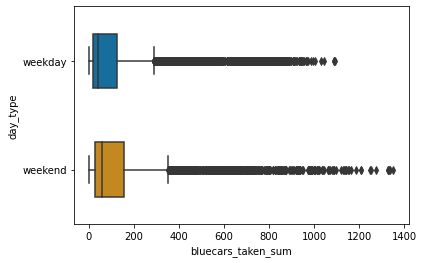

In [26]:
#Checking for outliers of Bluecars taken by day

bplot=sns.boxplot( x ='bluecars_taken_sum', y= 'day_type',
                 data=df, 
                 width=0.5,
                 palette="colorblind")

#  Observation

#  There are outliers in both weekday and weekend on blue cars taken

In [27]:
#dealing with outliers as this will distort the mean

Q1 = df.quantile(0.25) 
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(9783, 12)

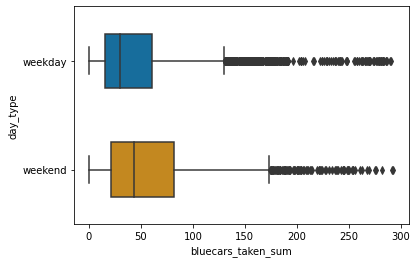

In [28]:
#Confirming that outliers have dealt with

bplot=sns.boxplot( x ='bluecars_taken_sum', y= 'day_type',
                 data=df_out, 
                 width=0.5,
                 palette="colorblind")


#5. Univariate and Bivariate analysis

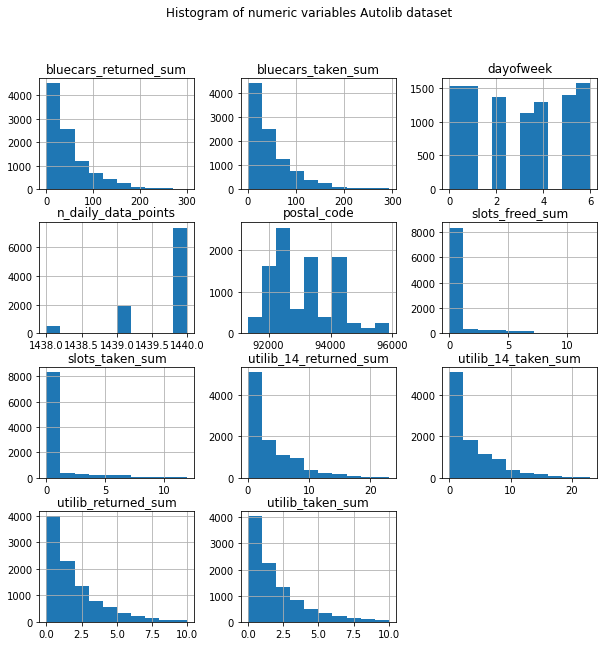

In [29]:
 #Plotting our numerical variables on histogram to assess the relationship
df_out.drop(['day_type'] ,axis=1).hist(bins=10, figsize=(10,10))
plt.suptitle("Histogram of numeric variables Autolib dataset")
plt.savefig('Electric car sharing Histogram')
plt.show()

#Blue cars taken is positively skewed

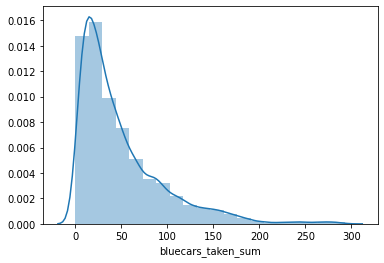

In [30]:
# Ditribution plot for bluecars taken
sns.distplot(df_out['bluecars_taken_sum'], bins=20)

# The distribution curve takes a normal distribution that is positively skewed

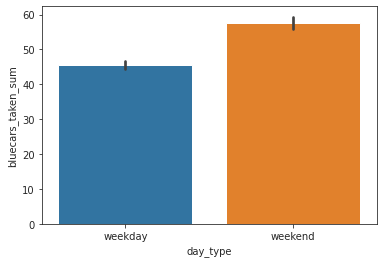

In [ ]:
#Creating subplots on blue cars taken by day

sns.barplot(x='day_type', y='bluecars_taken_sum', data = df_out)

#This shows that more cars are taken over the weekend than weekdays

In [ ]:
#plotting Correlation matrix
#
corrMatrix = df_out.corr() 
corrMatrix

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
postal_code,1.000000,0.001195,0.004671,-0.206847,-0.208021,-0.132142,-0.129783,-0.150472,-0.149341,-0.121932,-0.120596
n_daily_data_points,0.001195,1.000000,0.098400,0.003433,0.005715,0.010958,0.010642,0.011844,0.016537,-0.001043,-0.002158
dayofweek,0.004671,0.098400,1.000000,0.110733,0.103159,0.075870,0.077932,0.086363,0.083896,0.020186,0.014675
bluecars_taken_sum,-0.206847,0.003433,0.110733,1.000000,0.992041,0.626960,0.625355,0.751659,0.747126,0.312955,0.310257
bluecars_returned_sum,-0.208021,0.005715,0.103159,0.992041,1.000000,0.629297,0.627041,0.754341,0.750467,0.309676,0.309799
utilib_taken_sum,-0.132142,0.010958,0.075870,0.626960,0.629297,1.000000,0.896131,0.505760,0.497382,0.204125,0.203032
utilib_returned_sum,-0.129783,0.010642,0.077932,0.625355,0.627041,0.896131,1.000000,0.508498,0.500723,0.202881,0.202152
utilib_14_taken_sum,-0.150472,0.011844,0.086363,0.751659,0.754341,0.505760,0.508498,1.000000,0.948078,0.220987,0.219591
utilib_14_returned_sum,-0.149341,0.016537,0.083896,0.747126,0.750467,0.497382,0.500723,0.948078,1.000000,0.216981,0.218259
slots_freed_sum,-0.121932,-0.001043,0.020186,0.312955,0.309676,0.204125,0.202881,0.220987,0.216981,1.000000,0.985033


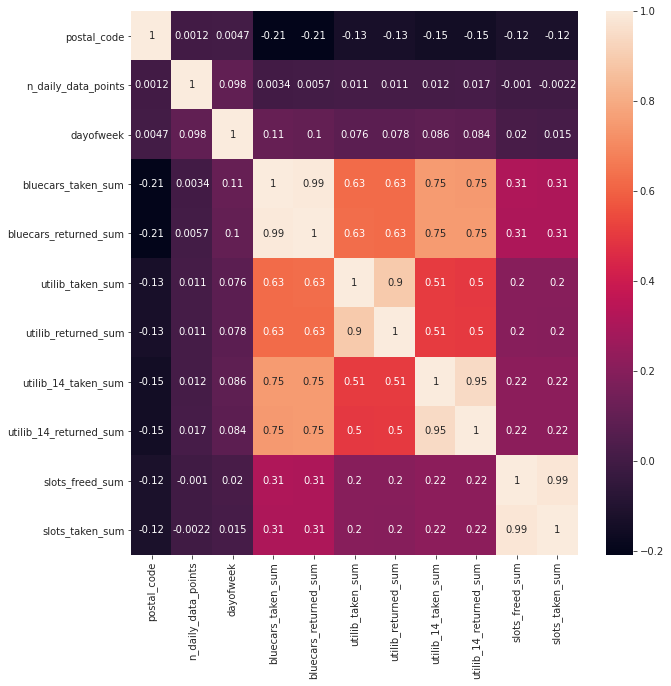

In [ ]:
# We can plot a visualisation of the matrix for better clarity

plt.figure(figsize=(10, 10)) 

# Creating our visualisation
# 
sns.heatmap(corrMatrix, annot = True) 

#There is a high correlation between Blue cars taken and number of blue cars returned, utilib 14 taken and returned

In [ ]:
 #Blue cars taken by day and postal code
 x=(df[['bluecars_taken_sum','day_type','postal_code']])
 x

,bluecars_taken_sum,day_type,postal_code
0,110,weekday,75001
1,98,weekday,75001
2,138,weekday,75001
3,104,weekday,75001
4,114,weekday,75001
...,...,...,...
16080,15,weekday,95880
16081,19,weekend,95880
16082,33,weekend,95880
16083,11,weekday,95880


#6.Hypothesis testing
a) Using Z-test
Hypothesis is a claim that we are trying to investigate. The basis of the hypothesis that we will investigate is:  

The management of Autolib are getting pressure from employees who want to take a day off over the weekend. The management is hesitant to allow this as they believe that the mean population of blue cars taken on weekdays is the same as those taken over the weekend. 
I have been tasked me to investigate this claim to gain evidence that there is no significance difference between the two, the employees think otherwise. This will strengthen their basis of argument as they believe the company need good number of employees to serve the high number of customers on the weekends (as this has only 2 days), while weekdays has 5 days. 

step1: We will create the hypothesis as below:
Testing whether the mean of blue cars taken in weekdays is the same as blue cars taken over the weekend.

Ho:blue cars taken weekdays-bluecars taken weekend=0 

H1:blue cars taken weekdays-bluecars taken weekend!=0 

step2: We will choose the appropriate statistical test
In this case we will use Z-score two tailed test

step 3: We will set our level of significance (alpha) to 0.05 

Step 4: We will compare our level of significance with the p- value if p value is lower or equals to sigma, we will will reject the Null hypothesis, if its greater, we will fail to reject the Null hypothesis.

step 5: Make conclusion of our decision

i)Hypothesis 1

Testing whether the mean of blue cars taken in weekdays is the same as blue cars taken over the weekend.

Ho:blue cars taken weekdays-bluecars taken weekend=0

H1:blue cars taken weekdays-bluecars taken weekend!=0

In [34]:
#Getting the population mean for Blue cars taken on weekdays and weekend

pd.pivot_table(df_out,index=['day_type'],values='bluecars_taken_sum',aggfunc='mean')

# mean of blue cars taken on weekday	45.56055
#mean of blue cars taken on weekend	57.718529


,bluecars_taken_sum
day_type,
weekday,45.560557
weekend,57.718529


In [35]:
#Printing blue cars taken on weekdays 

bluecars_taken_weekdays=df_out[df_out['day_type']=='weekday']['bluecars_taken_sum'].values
bluecars_taken_weekdays 

array([19, 10, 11, ..., 15, 15, 11])

In [36]:
#Printing blue cars taken on weekend

bluecars_taken_weekend=df_out[df_out['day_type']=='weekend']['bluecars_taken_sum'].values
bluecars_taken_weekend 

array([28, 24, 27, ..., 34, 19, 33])

In [37]:
# Getting a random sample size of 300 blue cars taken on weekdays

sampleofbluecars_taken_weekdays=bluecars_taken_weekdays[np.argsort(np.random.random_sample(len(bluecars_taken_weekdays)))[:300]]

sampleofbluecars_taken_weekdays 

array([ 12, 156,  10,  57, 130,  88, 131,  85,  98, 174,  27,  14,  70,
       101,  13,  28,   5,  13, 185,  28,   4,   9,   7,  19,   2,   8,
        81,  12,  17,  21, 179,  24,  20,  29,  23,  58, 120,  34,  73,
        21,  77,  27,  13,  20,  55,  38, 160,  11, 124,  83,  88,  52,
       281,  14,  24,  28, 105,  61,  43,  72, 120, 102,  36,  36,  99,
         8,   5,  46,  21,  38,  14,  27,  12,  40,  46,  38,  38,  47,
       100,   9,  70,  13,  32,  94,   2,  73,  31,  87, 175,   7,  23,
         4, 132,  19,  94,  91,  42,  88,  83,  63,  36,  38,   4, 154,
       125,  82, 118,  16,  82,  45, 191,  52,  13,   3,  34, 136, 150,
        30,   9,  45,  17,  51,  17,  11,  14,  36,  19,  61,  21,  24,
        41,  29,  28,  73,  41, 148,  17,  20,  17,  39,   7,  80,  81,
         7,  13,  14,   7,  34,  56,   1,  35,  38,  38,  27,  81,  29,
        24, 119,   1,  63,  81,  97,  15,  49,  94, 102,  19,   1,  29,
        33,  13,  28,  23,   7,   1,  31,  50,  14,  42,  14,  4

In [38]:
# Getting a random sample size of 300 blue cars taken on weekend

sampleofbluecars_taken_weekend=bluecars_taken_weekend[np.argsort(np.random.random_sample(len(bluecars_taken_weekend)))[:300]]

sampleofbluecars_taken_weekend

array([ 36, 136,  71,  59, 145,  85,  87,  40,  21,  47, 103, 128,  94,
        42,  64, 171,  11, 100,  51,  47,  10, 112,  72,  24, 102,  26,
       118,  84,  50,  56,  88,  92,  15,  50, 137,  62,  49,   7,  77,
        36,  15,  38,  65,  89,  54,  19, 154,  80,  90,   9,  16, 130,
       108, 171,  54,  20, 165, 221, 134,  21,  40, 189,   6,  13, 106,
        50,  68,  22,  32,   1,   9,  22,  26,  18, 125,  10,  12,  67,
        23, 137,  27,  23,  82,  86,  27, 143,  24,  36,  50,  28, 136,
       147,  65,  14,  23,  79, 155,  13, 108,  52,  40,  47,  95,  61,
        47,  40, 108,  50,  65,  72,  43, 116,  30,   9,  21,  26, 113,
        20,  14,  24,  11, 105,  17,   7, 159,  95,  52,  10,  19, 117,
       210,  24,  33,  29, 142,  98,  16, 164, 139,  16,  29,  28,  84,
        42, 121,  13,  46, 103, 106,  34,  20,  21,   3, 169,  97,  20,
       163,  35,  12,  44,  58,  35,  21,  27, 117, 194, 211,  24,  87,
        28, 187,  33, 134,  10,  63,   2,   5,  49, 109,  26,  4

In [39]:
#Calculating variance of blue cars population and mean of sample blue cars for weekdays and weekend

varianceofPopbluecars_taken_weekdays=np.var(bluecars_taken_weekdays) 
varianceofPopbluecars_taken_weekend=np.var(bluecars_taken_weekend)


meanOfSampcars_weekdays=np.mean(sampleofbluecars_taken_weekdays)
meanOfSampcars_weekend=np.mean(sampleofbluecars_taken_weekend)

n1=300 
n2=300

In [44]:
 #Calculating the Z-test which is the observed value
 #We have population parameters we can calculate the variance of the population
 #Hence calculating the z value which is our observed values
 #Note mu1-mu1=0 so we don't need to calculate it, this comes from our hypothesis testing Ho

import math 
(meanOfSampcars_weekdays-meanOfSampcars_weekend) - (0) / (math.sqrt((varianceofPopbluecars_taken_weekdays/300)+(varianceofPopbluecars_taken_weekend/300)))

-12.370000000000005

In [46]:
#calculating p value
zscore=-12.37000
pval = stats.norm.cdf(zscore)
print(pval)
pd.options.display.float_format='{:.8f}'.format 

#alpha of 0.05
if pval < 0.05:
  print('Reject null hypothesis')
else:
  print('Fail to reject hypothesis')

1.8991070305508434e-35
Reject null hypothesis


ii)Hypothesis 2

Testing population mean for Blue cars taken from postal code 92100 is greater than those taken form postal code 91330 

Ho:blue cars taken from postal code 92100>=bluecars taken from postal code 91330

H1:blue cars taken from postal code 92100< bluecars taken from postal code 91330

In [48]:
#Getting the population mean for Blue cars taken from postal code 92100 is greater than those taken form postal code 91330 

pd.pivot_table(df_out,index=['postal_code'],values='bluecars_taken_sum',aggfunc='mean')

# mean of blue cars taken from postal code 91330 	12.18461538 
#mean of blue cars taken from postal code 92100 weekend	258.2 

,bluecars_taken_sum
postal_code,
91330,12.18461538
91370,14.37692308
91400,9.01538462
92000,163.87610619
92100,258.25000000
...,...
94700,34.74615385
94800,82.87596899
95100,24.69230769


In [63]:
#Changing postal code dtype from interger to string
df_out['postal_code']=df_out.astype(str)
df_out

df_out.dtypes

postal_code               object
n_daily_data_points        int64
dayofweek                  int64
day_type                  object
bluecars_taken_sum         int64
bluecars_returned_sum      int64
utilib_taken_sum           int64
utilib_returned_sum        int64
utilib_14_taken_sum        int64
utilib_14_returned_sum     int64
slots_freed_sum            int64
slots_taken_sum            int64
dtype: object

In [64]:
#Printing blue cars taken from postal code 92100 

bluecars_x=df_out[df_out['postal_code']=='92100']['bluecars_taken_sum'].values
bluecars_x

array([284, 233, 282, 234])

In [65]:
#Printing blue cars taken from  postal code 91330

bluecars_y=df_out[df_out['postal_code']=='91330']['bluecars_taken_sum'].values
bluecars_x

array([284, 233, 282, 234])

In [71]:
# Getting a random sample size of 10 blue cars taken from 92100

samplex=bluecars_x[np.argsort(np.random.random_sample(len(bluecars_x)))[:10]]

samplex

array([234, 282, 233, 284])

In [72]:
# Getting a random sample size of 10 blue cars taken from 91330

sampley=bluecars_y[np.argsort(np.random.random_sample(len(bluecars_y)))[:10]]

sampley

array([20,  3,  6, 16,  3,  2,  9, 16,  3,  2])

In [73]:
#Calculating variance of blue cars population and mean of sample blue cars for weekdays and weekend

varpopx=np.var(bluecars_x) 
varpopy=np.var(bluecars_y)


meansamplex=np.mean(samplex)
meansampley=np.mean(sampley)

n1=10 
n2=10

In [74]:
 #Calculating the Z-test which is the observed value
 #We have population parameters we can calculate the variance of the population
 #Hence calculating the z value which is our observed values
 #Note mu1-mu1=0 so we don't need to calculate it, this comes from our hypothesis testing Ho

import math 
(meansamplex-meansampley) - (0) / (math.sqrt((varpopx/10)+(varpopy/10)))

250.25

In [75]:
#calculating p value
zscore=250.25
pval = stats.norm.cdf(zscore)
print(pval)

#alpha of 0.05
if pval < 0.05:
  print('Reject null hypothesis')
else:
  print('Fail to reject hypothesis')

1.0
Fail to reject hypothesis



The p-value is 1.0 this is greater than alpha which is 
0.05 We therefore have enough evidence that the mean of cars taken from postal code 92100 is greater than those taken from postal code 91330